[View in Colaboratory](https://colab.research.google.com/github/tkms0106/python-data-science/blob/master/python_data_science4_22.ipynb)

In [0]:
import numpy as np
from pandas import Series, DataFrame

In [0]:
import pandas as pd

In [0]:
arr = np.array([[1,2,np.nan], [np.nan,3,4]])

In [8]:
arr

array([[ 1.,  2., nan],
       [nan,  3.,  4.]])

In [0]:
dframe1 = DataFrame(arr, index=['A','B'], columns = ['One','Two','Three'])

In [10]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [11]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [12]:
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [13]:
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [14]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [15]:
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [16]:
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [17]:
!pip install pandas_datareader
import pandas_datareader as pdr

    100% |████████████████████████████████| 112kB 4.9MB/s 
    100% |████████████████████████████████| 5.8MB 3.9MB/s 
  Running setup.py bdist_wheel for wrapt ... - \ done
  Stored in directory: /root/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
  Running setup.py bdist_wheel for requests-ftp ... - done
  Stored in directory: /root/.cache/pip/wheels/2a/98/32/37195e45a3392a73d9f65c488cbea30fe5bad76aaef4d6b020
Successfully built wrapt requests-ftp


In [0]:
import datetime

In [0]:
end = datetime.datetime.now()

In [0]:
start = datetime.datetime(end.year-1, end.month, end.day)

In [0]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
for stock in tech_list:
  temp = pdr.DataReader(stock,'robinhood',start,end)
  globals()[stock] = temp.drop(['session','interpolated'],axis=1).astype('float64')

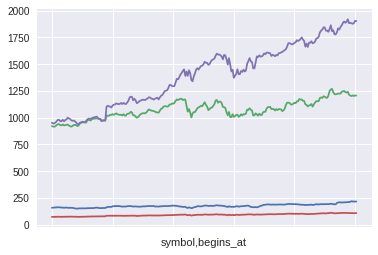

In [22]:
%matplotlib inline
AAPL['close_price'].plot()
GOOG['close_price'].plot()
MSFT['close_price'].plot()
AMZN['close_price'].plot()

In [0]:
rets = AAPL['close_price'].pct_change()

In [24]:
DataFrame(rets.head())

close_price
symbol begins_at              
AAPL   2017-08-24          NaN
       2017-08-25     0.003704
       2017-08-28     0.010071
       2017-08-29     0.008918
       2017-08-30     0.002701

In [0]:
frame = DataFrame({
                  'AAPL':AAPL['close_price'].reset_index().drop(['symbol','begins_at'],axis=1)['close_price'].values.tolist(),
                  'GOOG':GOOG['close_price'].reset_index().drop(['symbol','begins_at'],axis=1)['close_price'].values.tolist(),
                  'MSFT':MSFT['close_price'].reset_index().drop(['symbol','begins_at'],axis=1)['close_price'].values.tolist(),
                  'AMZN':AMZN['close_price'].reset_index().drop(['symbol','begins_at'],axis=1)['close_price'].values.tolist()
                  },
                  index=range(AAPL['close_price'].size))

In [26]:
frame

,AAPL,AMZN,GOOG,MSFT
0,156.8977,952.45,921.28,71.4031
1,157.4789,945.26,915.89,71.5308
2,159.0649,946.02,913.81,71.5407
3,160.4835,954.06,921.29,71.7568
4,160.9169,967.59,929.57,72.6998
5,161.5572,980.60,939.33,73.4463
6,161.6065,978.25,937.34,72.6310
7,159.6658,965.27,928.45,72.3069
8,159.4984,967.80,927.81,72.1006
9,158.8581,979.47,935.95,73.0239


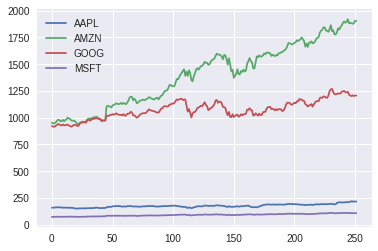

In [27]:
frame.plot()

In [0]:
rets = frame.pct_change()

In [29]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
0,NaN,NaN,NaN,NaN
1,0.003704,-0.007549,-0.005851,0.001788
2,0.010071,0.000804,-0.002271,0.000138
3,0.008918,0.008499,0.008186,0.003021
4,0.002701,0.014181,0.008987,0.013142


In [30]:
rets.corr()

,AAPL,AMZN,GOOG,MSFT
AAPL,1.000000,0.472142,0.579406,0.590143
AMZN,0.472142,1.000000,0.649507,0.693559
GOOG,0.579406,0.649507,1.000000,0.778064
MSFT,0.590143,0.693559,0.778064,1.000000


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

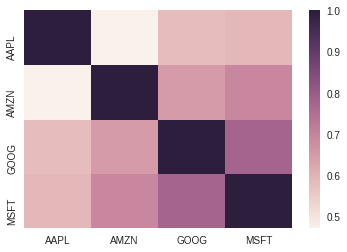

In [32]:
sns.heatmap(rets.corr())

In [33]:
!pip show pandas matplotlib

Name: pandas
Version: 0.22.0
Summary: Powerful data structures for data analysis, time series,and statistics
Home-page: http://pandas.pydata.org
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: pytz, numpy, python-dateutil
Required-by: vega-datasets, statsmodels, pandas-gbq, pandas-datareader, altair
---
Name: matplotlib
Version: 2.1.2
Summary: Python plotting package
Home-page: http://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, pyparsing, cycler, numpy, python-dateutil, pytz
Required-by: scikit-image


In [34]:
!python -V

Python 3.6.3
